In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\prave\Downloads\daily_offers.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


### Information about the dataset

In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# check null values
df.isnull().sum().sort_values(ascending=False)

material_ref     77919
country             28
application         24
id                   2
status               2
item_date            1
customer             1
thickness            1
delivery date        1
selling_price        1
quantity tons        0
item type            0
width                0
product_ref          0
dtype: int64

* "application" and "country" Nan values are belongs to one customer (2.147484e+09).                     

## Data Cleaning

In [6]:
# Let's drop the "material_ref" and "id"column
df.drop(columns=['material_ref','id'],axis=1,inplace=True)

In [7]:
# Now drop all Nan values
df=df.dropna()

In [8]:
# check duplicate rows
df.duplicated().sum()

0

In [9]:
# remove 'e' value from "quantity tons"
df=df[~(df['quantity tons']=='e')]

# remove 19950000 & 20191919 values in "item_date" column which are not matching with datetime data type
df=df[~(df['item_date']==19950000)]
df=df[~(df['item_date']==20191919)]

# remove irrelivant values form "delivery date" column
df=df[~(df['delivery date']==30310101)]
df=df[~(df['delivery date']==20212222)]

**Change Data Type**

In [10]:
# change "customer" column data type into "int64"
df['customer']=df['customer'].astype('int64')

# change "quantity tons" data type into "float64"
df['quantity tons']=df['quantity tons'].astype('float')

# change "item_date" data type into "str"
df['item_date']=df['item_date'].astype(str)

# change 'delivery_date' data type into "str"
df['delivery date']=df['delivery date'].astype(str)

In [11]:
# change both "item_date" & "delivery date" columns into datetime

df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d.0')

df['delivery date']=pd.to_datetime(df['delivery date'],format='%Y%m%d.0')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181633.0,5.876167e+03,2.349333e+06,-2000.00,1.096819e+01,3.036258e+01,6.716145e+01,1.000000e+09
customer,181633.0,3.023251e+07,1.005621e+05,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181633.0,4.489301e+01,2.440424e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181633.0,2.561607e+01,1.775393e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181633.0,2.564190e+00,6.572602e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181633.0,1.295264e+03,2.616447e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181633.0,4.740346e+08,7.175403e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181633.0,1.918355e+03,3.318313e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


* In the "selling_price" column we have negative values.
* And, In "quantity tons" also have negative values.       

In [13]:
# let's convert negative values into positive values
df['quantity tons']=df['quantity tons'].abs()

df['selling_price']=df['selling_price'].abs()

### Creating New Feature 

In [14]:
# create "amount_spent" column with quantity tons & selling_price
df['amount_spent']=df['quantity tons'] * df['selling_price']

In [15]:
# add the columns- month,weekday for the item_date
df.insert(loc=1,column='item_month',value=df['item_date'].dt.month)

# +1 to make monday=1...........until sunday=7
df.insert(loc=2,column='item_weekday',value=(df['item_date'].dt.dayofweek)+1)

In [16]:
# create days took to delivery the item i.e "delivery_Days"
df['delivery_days']=abs(df['delivery date']-df['item_date']).dt.days

In [17]:
df.head(3)

,item_date,item_month,item_weekday,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,amount_spent,delivery_days
0,2021-04-01,4,4,54.151139,30156308,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,46245.072381,91
1,2021-04-01,4,4,768.024839,30202938,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,804122.006642,0
2,2021-04-01,4,4,386.127949,30153963,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,248793.821315,90


## Data Visualization & Mining

**Top 10 customers with most no.of  steel purchase**

In [18]:
temp=df.groupby(by=['customer','country'],as_index=False)['customer'].value_counts().sort_values(by='count',ascending=False)
temp.head(10)

,customer,country,count
60,30157111,78.0,4987
89,30161088,78.0,3733
252,30201846,25.0,3152
134,30165529,78.0,2728
288,30202938,25.0,2570
312,30205312,32.0,2522
34,30153510,30.0,2510
84,30160378,78.0,2256
322,30205658,32.0,2151
76,30160005,78.0,2132


**Top 10 customers with highest money spent**

In [19]:
money_spent=df.groupby(by=['customer','country'],as_index=False)['amount_spent'].sum().sort_values(by='amount_spent',ascending=False).head(10)
money_spent

,customer,country,amount_spent
325,30205728,30.0,5.830132e+11
224,30200964,25.0,4.431428e+10
974,30353306,107.0,4.381604e+09
417,30217607,27.0,9.239216e+08
195,30198507,26.0,3.126882e+08
60,30157111,78.0,2.956766e+08
277,30202645,32.0,2.955646e+08
459,30223403,78.0,2.531759e+08
1058,30394817,78.0,2.507976e+08
697,30287258,27.0,2.437241e+08


**Average Quantity tons steel items each customers purchased**

In [20]:
avg_tons=df.groupby(by=['customer','country'],as_index=False)['quantity tons'].mean()
avg_tons

,customer,country,quantity tons
0,12458,26.0,29.944622
1,30147616,25.0,45.373855
2,30147620,25.0,32.672705
3,30147722,78.0,61.535862
4,30147800,25.0,54.641850
...,...,...,...
1162,30407721,27.0,73.107607
1163,30407931,78.0,51.944285
1164,30407962,113.0,25.618379
1165,30408166,27.0,484.327970


In [21]:
# top 5 highest average tons 
avg_tons.sort_values(by='quantity tons',ascending=False).head()

,customer,country,quantity tons
325,30205728,30.0,4.717074e+06
224,30200964,25.0,3.819233e+05
521,30235913,78.0,4.337218e+03
831,30333845,78.0,4.137256e+03
1061,30395031,78.0,3.607611e+03


### Customer Purchasing Pattern

<AxesSubplot:title={'center':'Frequency of purchase by month'}>

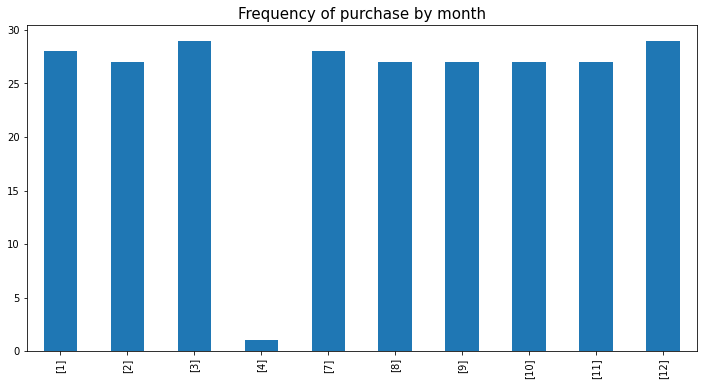

In [22]:
# number of purchase in month
plt.figure(figsize=(12,6))
plt.title('Frequency of purchase by month',fontsize=15)
itemdate=df.groupby(['item_date'])['item_month'].unique()
itemdate.value_counts().sort_index().plot.bar()

<AxesSubplot:title={'center':'Frequency of purchase by weekday'}>

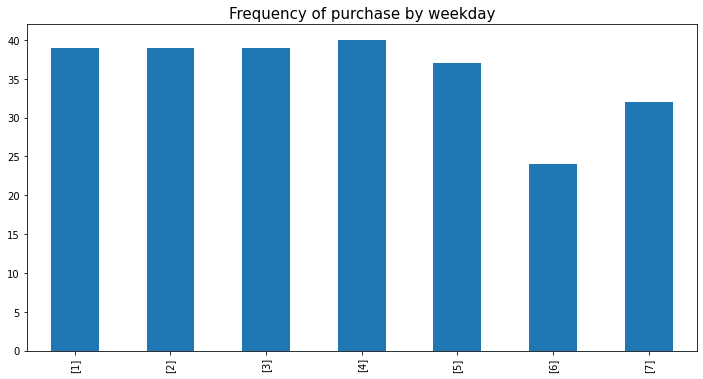

In [23]:
# number of purchase in weekday
plt.figure(figsize=(12,6))
plt.title('Frequency of purchase by weekday',fontsize=15)
itemdate=df.groupby(['item_date'])['item_weekday'].unique()
itemdate.value_counts().sort_index().plot.bar()

**Insight**                
<!--  -->         

* The month of **April** has the lowest purchase rate. it might be because of our dataset has only one day value i.e(2021-04-01)
* **Saturday** has the lowest purchase rate. and followed by **Sunday**        

### Application Pattern

In [24]:
# Average of application in month
year_month=pd.DataFrame(df.groupby(['item_month'],as_index=False)['application'].mean().sort_values(by='application',ascending=False))
year_month.columns=['month','avg_applications']
year_month

,month,avg_applications
6,9,27.549756
9,12,26.943111
2,3,26.058740
7,10,25.641968
4,7,25.562507
3,4,25.112462
0,1,24.811961
5,8,24.601001
1,2,24.444432
8,11,24.407743


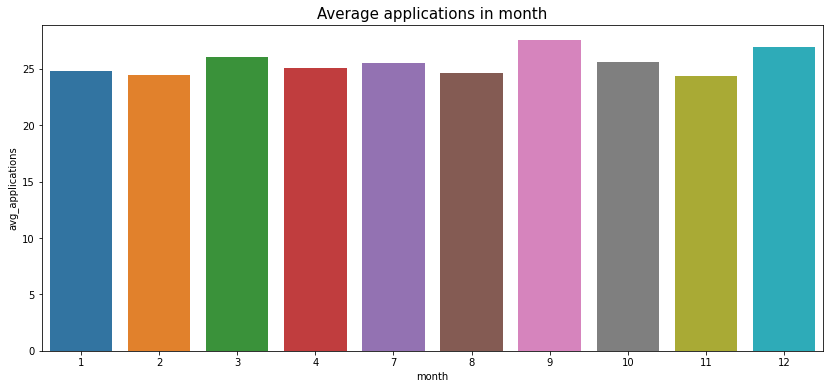

In [25]:
plt.figure(figsize=(14,6))
sns.barplot(x='month',y='avg_applications',data=year_month)
plt.title("Average applications in month",fontsize=15)
plt.show()

In [26]:
# Average applications in weeday
weekday=pd.DataFrame(df.groupby(['item_weekday'],as_index=False)['application'].mean().sort_values(by='application',ascending=False))
weekday.columns=['weekday','avg_applications']
weekday

,weekday,avg_applications
6,7,30.240888
1,2,26.415008
0,1,26.332056
3,4,25.235390
2,3,24.995396
4,5,24.747428
5,6,20.713942


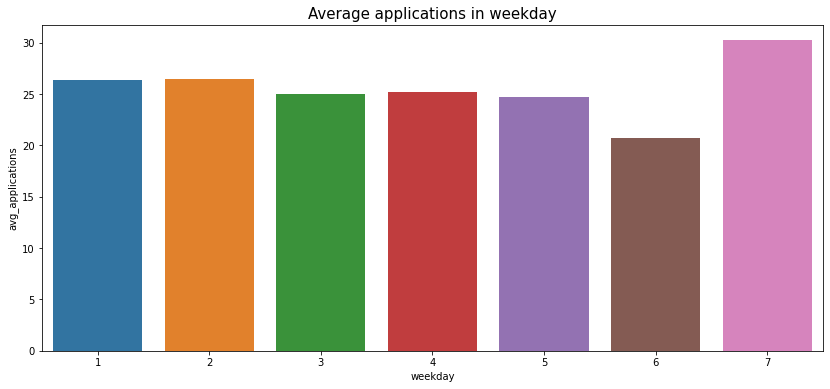

In [27]:
plt.figure(figsize=(14,6))
sns.barplot(x='weekday',y='avg_applications',data=weekday)
plt.title("Average applications in weekday",fontsize=15)
plt.show()

In [28]:
# Average application in item type
item_type=pd.DataFrame(df.groupby(['item type'],as_index=False)['application'].mean().sort_values(by='application',ascending=False))
item_type.columns=['item_type','avg_applications']
item_type

,item_type,avg_applications
4,SLAWR,41.000000
6,WI,29.419847
5,W,27.953110
1,Others,26.898361
3,S,23.120054
0,IPL,17.518519
2,PL,12.072792


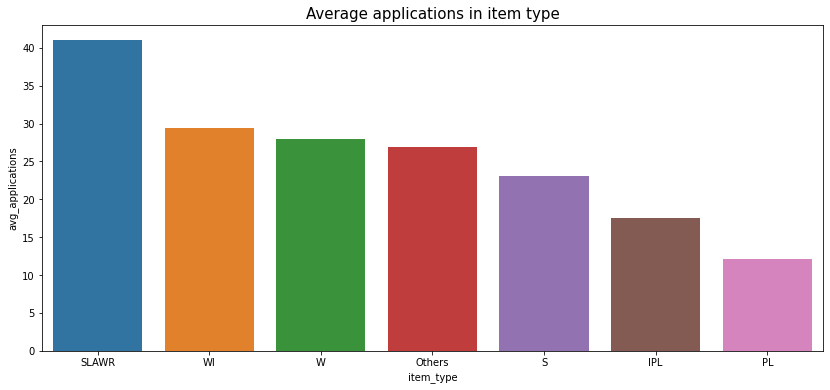

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x='item_type',y='avg_applications',data=item_type)
plt.title("Average applications in item type",fontsize=15)
plt.show()

In [30]:
# Average application in country
country=pd.DataFrame(df.groupby(['country'],as_index=False)['application'].mean().sort_values(by='application',ascending=False))
country.columns=['country','avg_applications']
country

,country,avg_applications
15,107.0,56.000000
16,113.0,41.471989
5,32.0,27.250992
2,27.0,26.746525
1,26.0,26.576070
10,78.0,26.376274
0,25.0,26.182869
9,77.0,25.814475
7,39.0,24.684987
4,30.0,24.071018


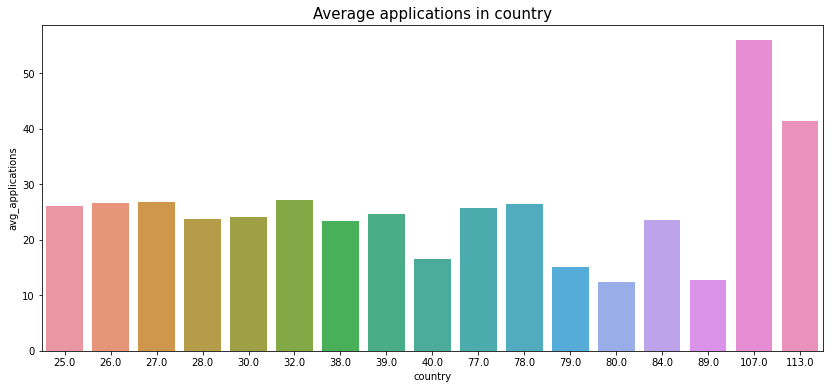

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(x='country',y='avg_applications',data=country)
plt.title("Average applications in country",fontsize=15)
plt.show()

**Application Insight**          
<!--  -->         
* The month of September(9) is getting the highest applications. and there is no big difference between all the months they are getting decent applications.             
* **Sunday** is getting the highest applications. And least applications on **saturday**                 
* Item Type **SLWAR** is getting the highest application. And **PL** is getting lowest application           
* country **107** is getting the highest application. And **113** is getting lowest application 

### Country Wise Purchasing Pattern

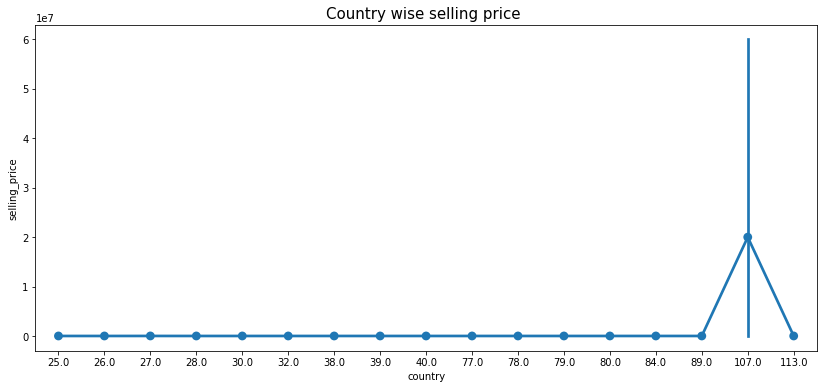

In [32]:
plt.figure(figsize=(14,6))
sns.pointplot(x='country',y='selling_price',data=df)
plt.title("Country wise selling price ",fontsize=15)
plt.show()

In [33]:
# average quantity(tons) ordered by country wise
quantity=df.groupby(['country'],as_index=False)['quantity tons'].mean().sort_values(by='quantity tons',ascending=False)
quantity.columns=['country','avg_quantity']
quantity

,country,avg_quantity
4,30.0,114969.335259
0,25.0,2218.383983
15,107.0,306.010643
1,26.0,136.301624
2,27.0,131.114230
6,38.0,116.910183
7,39.0,111.710126
10,78.0,99.240156
5,32.0,98.506904
8,40.0,88.412882


In [34]:
# average amount spent on steel items by country wise
amount=df.groupby(['country'],as_index=False)['amount_spent'].mean().sort_values(by='amount_spent',ascending=False)
amount.columns=['country','avg_amount_spent']
amount

,country,avg_amount_spent
15,107.0,8.763209e+08
4,30.0,6.703793e+07
0,25.0,1.960026e+06
2,27.0,1.455360e+05
1,26.0,1.057823e+05
6,38.0,9.581451e+04
7,39.0,8.380323e+04
10,78.0,7.753385e+04
5,32.0,7.542122e+04
16,113.0,6.868089e+04


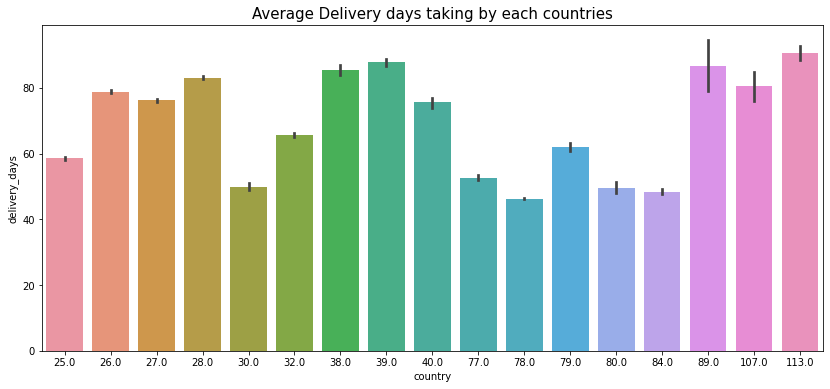

In [35]:
# average delivery days taking by each countries
plt.figure(figsize=(14,6))
sns.barplot(x='country',y='delivery_days',data=df)
plt.title('Average Delivery days taking by each countries',fontsize=15)
plt.show()

<AxesSubplot:xlabel='country', ylabel='count'>

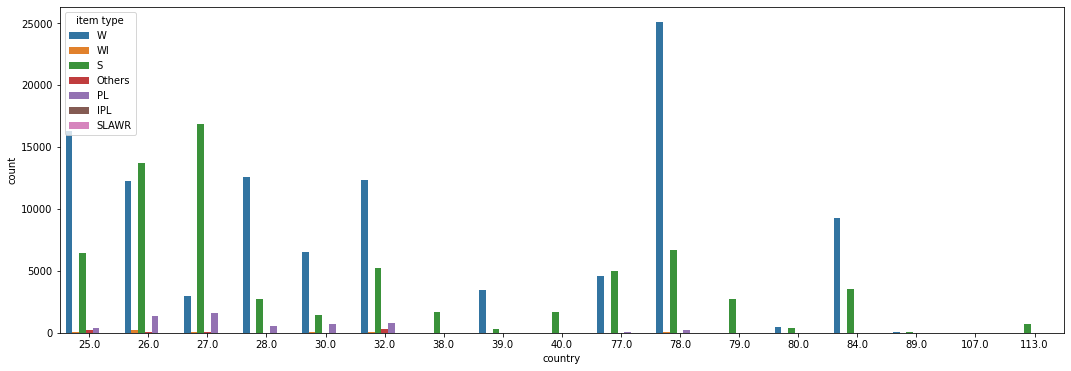

In [36]:
# item types by country wise
plt.figure(figsize=(18,6))
sns.countplot(x='country',hue='item type',data=df)

**Country Insight**         
<!--  -->         
* All countries have the same selling price, except country 107 its selling price is double compared to the rest of the countries.

* country **30** customers are purchasing the highest quantity(tons) of steel items which is 10 times higher than other country customers.       
* country **107** spent more money compared to other countries. And **89** spending least amount.              
* all countries Item type buying priorities are **W < S < PL < others < WI < IPL < SLAWR** .

### Item Type pattern

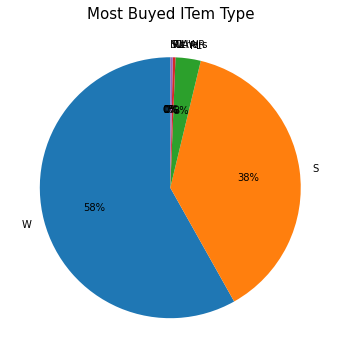

In [37]:
# most buyed item type
item_count=df['item type'].value_counts()
item_label=df['item type'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(18,6))
# pie plot
ax.pie(item_count,labels=item_label,autopct='%1.0f%%',startangle=90)
ax.set_title('Most Buyed ITem Type',fontsize=15)
plt.show()

In [38]:
# average sellin pricing on item type
price=df.groupby(['item type'],as_index=False)['selling_price'].mean().sort_values(by='selling_price',ascending=False)
price.columns=['item_type','avg_selling_price']
price

,item_type,avg_selling_price
2,PL,18382.464998
3,S,2247.200587
4,SLAWR,1195.000000
5,W,833.697771
0,IPL,778.907407
1,Others,748.082885
6,WI,690.747118


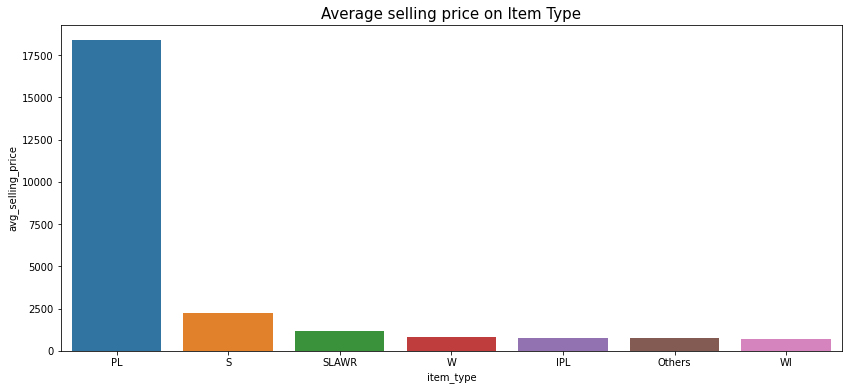

In [39]:
plt.figure(figsize=(14,6))
sns.barplot(x='item_type',y='avg_selling_price',data=price)
plt.title("Average selling price on Item Type",fontsize=15)
plt.show()

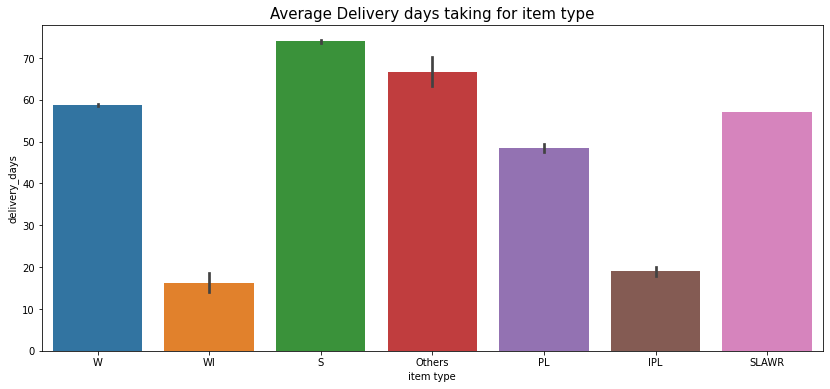

In [40]:
# Average deliver days taking for item type
plt.figure(figsize=(14,6))
sns.barplot(x='item type',y='delivery_days',data=df)
plt.title('Average Delivery days taking for item type',fontsize=15)
plt.show()

**Item Type Insight**          
<!--  -->               
* Most buyed item type is **W** and followed by **S**              
* Item type **PL** is the highest average selling price.          
* Item type **S** taking longest delivery days. and **Wi** taking least days

### Status Pattern

In [41]:
df['status'].value_counts()

Won                116005
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4168
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

<Figure size 864x864 with 0 Axes>

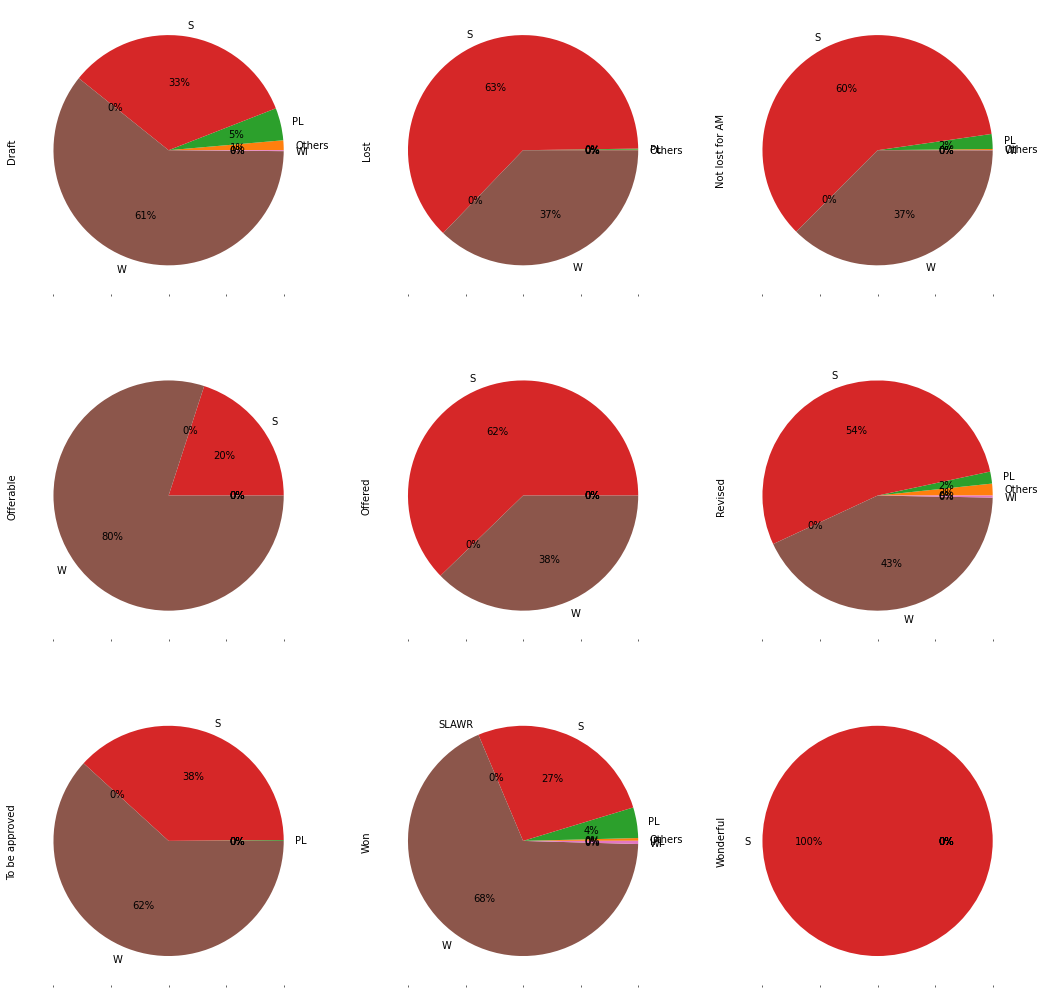

In [42]:
# What is the percentage of item type are impact on status
plt.figure(figsize=(12,12))
pd.crosstab(index=df['item type'],columns=df['status']).plot(kind='pie',figsize=(18,18),
                                                                    subplots=True,layout=(3,3),autopct='%1.0f%%',legend=False)
plt.show()

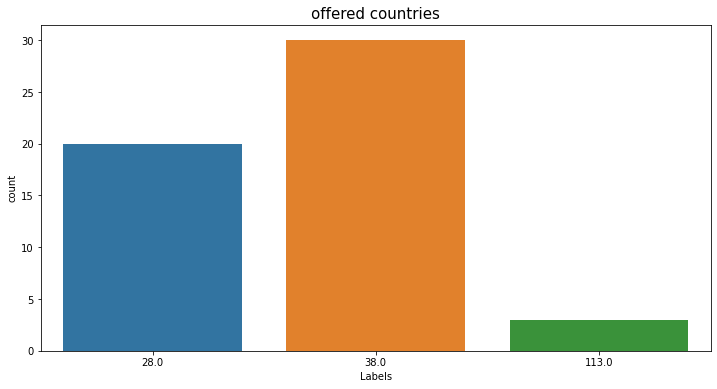

In [43]:
# which country is getting offered status
offered=df.loc[df['status']=='Offered',['country']]

plt.figure(figsize=[12,6])

sns.countplot(offered['country'])
plt.title('offered countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

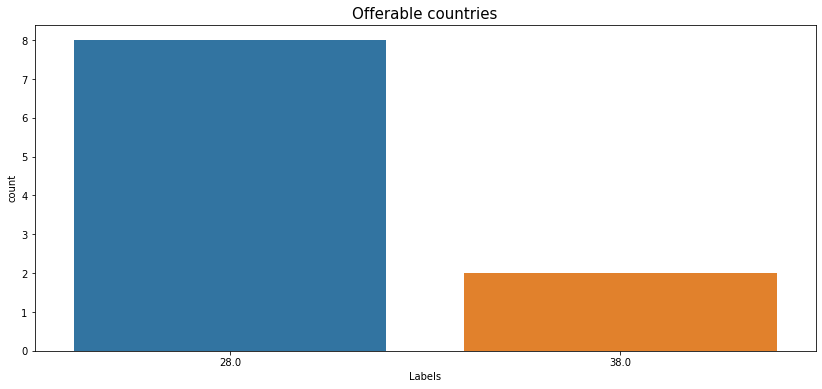

In [44]:
# which country status is offerable
offerable=df.loc[df['status']=='Offerable',['country']]

plt.figure(figsize=[14,6])

sns.countplot(offerable['country'])
plt.title('Offerable countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

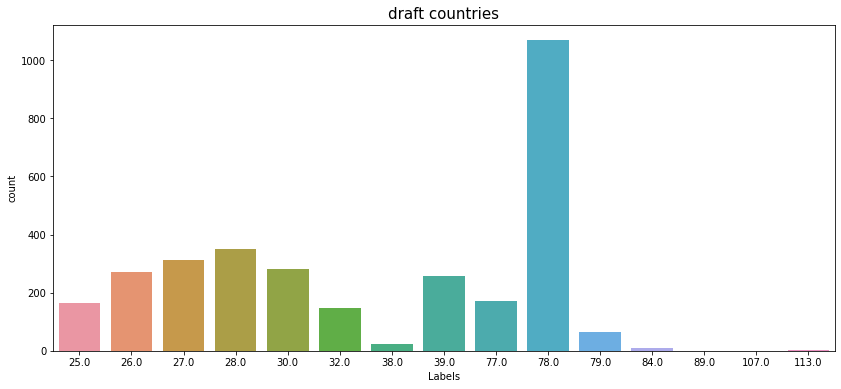

In [45]:
# which countries status is draft
draft=df.loc[df['status']=='Draft',['country']]

plt.figure(figsize=[14,6])

sns.countplot(draft['country'])
plt.title('draft countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

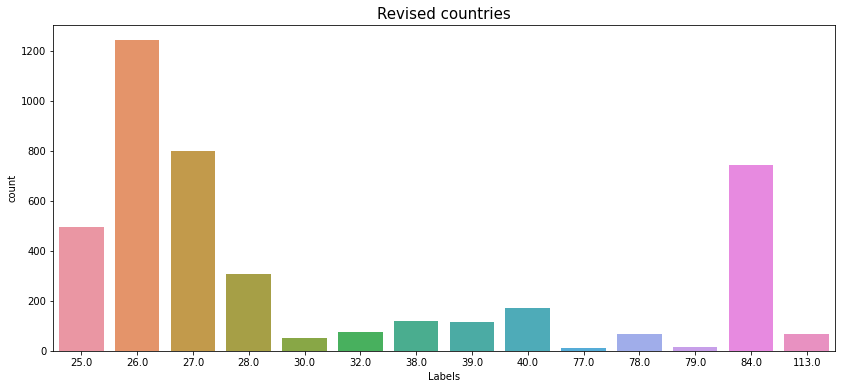

In [46]:
# which countries are revised
revised=df.loc[df['status']=='Revised',['country']]

plt.figure(figsize=[14,6])

sns.countplot(revised['country'])
plt.title('Revised countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

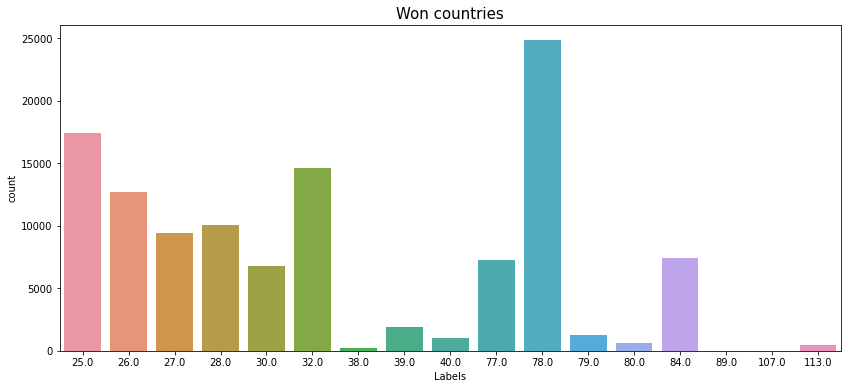

In [47]:
# which countries are won
won=df.loc[df['status']=='Won',['country']]

plt.figure(figsize=[14,6])

sns.countplot(won['country'])
plt.title('Won countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

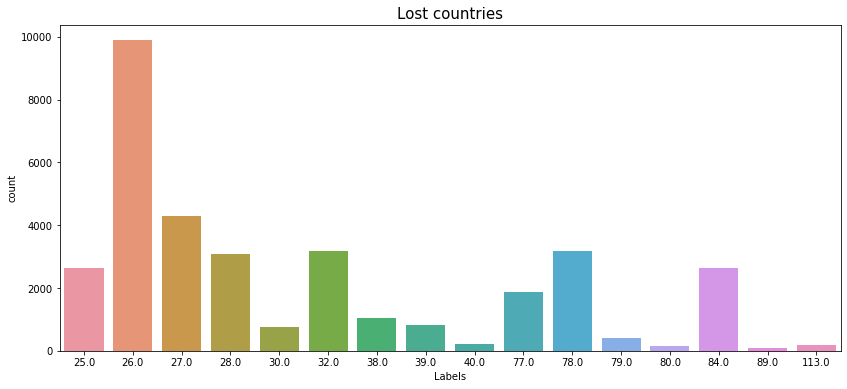

In [48]:
# which countries are lost
lost=df.loc[df['status']=='Lost',['country']]

plt.figure(figsize=[14,6])

sns.countplot(lost['country'])
plt.title('Lost countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

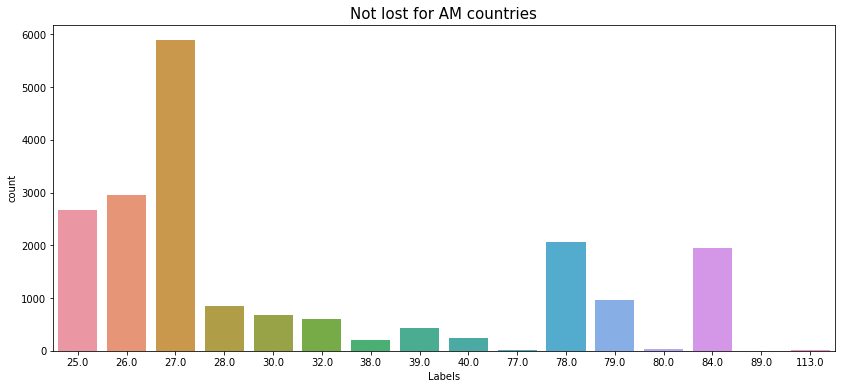

In [49]:
# which countries are Not Lost for AM 
not_lost=df.loc[df['status']=='Not lost for AM',['country']]

plt.figure(figsize=[14,6])

sns.countplot(not_lost['country'])
plt.title('Not lost for AM countries',fontsize=15)
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

<Figure size 864x864 with 0 Axes>

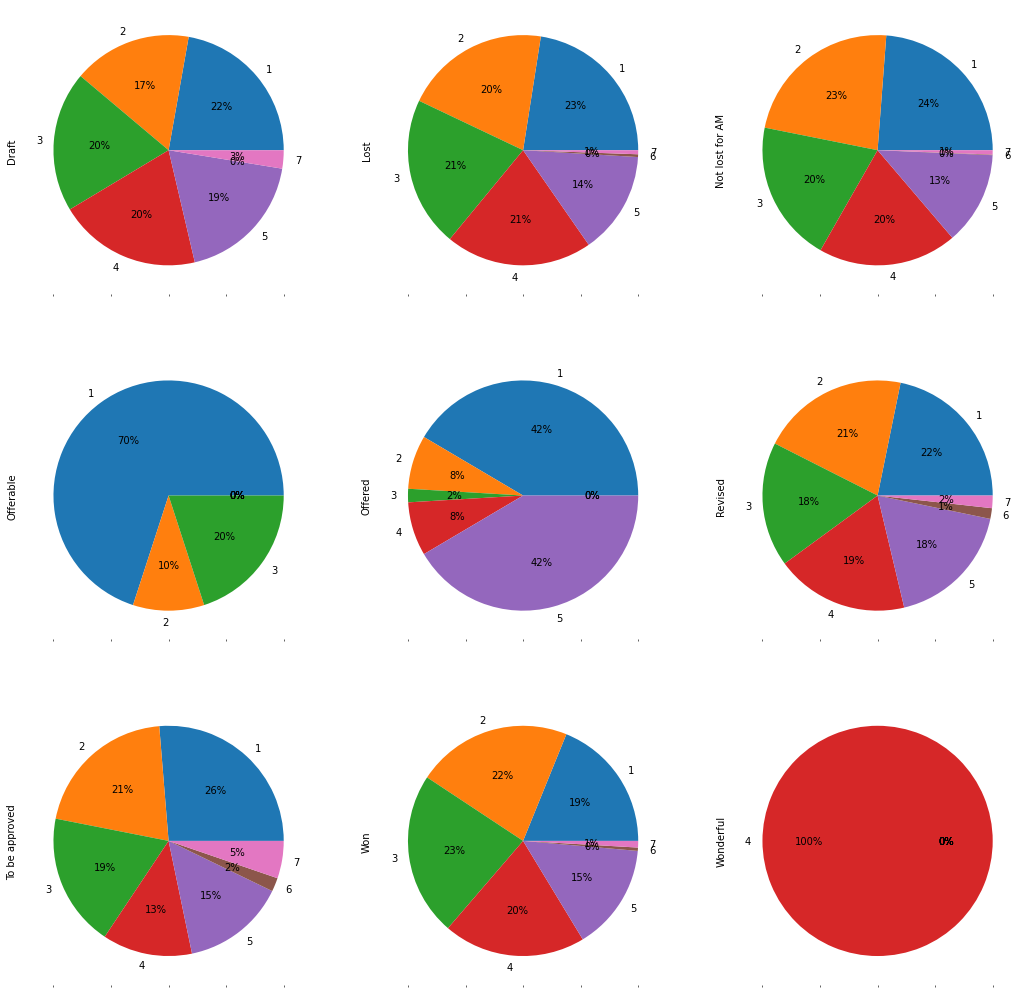

In [50]:
# What is the percentage of Weekdays are impact on status
plt.figure(figsize=(12,12))
pd.crosstab(index=df['item_weekday'],columns=df['status']).plot(kind='pie',figsize=(18,18),
                                                                    subplots=True,layout=(3,3),autopct='%1.0f%%',legend=False)
plt.show()

In [51]:
# Average selling price on status
price=df.groupby(['status'],as_index=False)['selling_price'].mean().sort_values(by='selling_price',ascending=False)
price.columns=['status','avg_selling_price']
price

,status,avg_selling_price
6,To be approved,24922.346886
2,Not lost for AM,5956.640256
8,Wonderful,1136.000000
4,Offered,1017.358491
3,Offerable,951.000000
5,Revised,855.863548
7,Won,831.461749
1,Lost,806.730280
0,Draft,16.550785


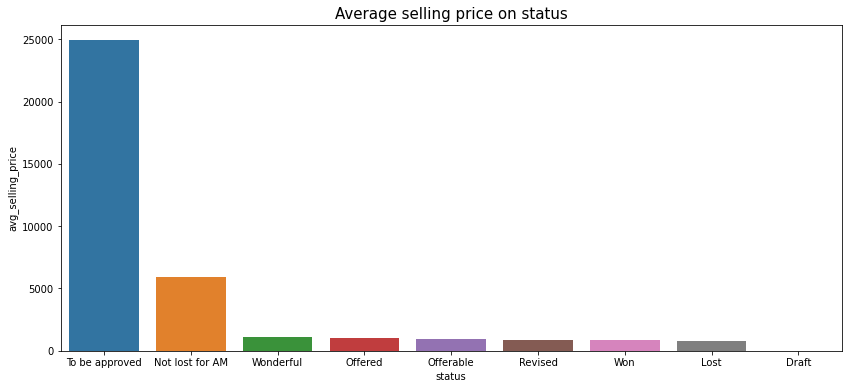

In [52]:
plt.figure(figsize=(14,6))
sns.barplot(x='status',y='avg_selling_price',data=price)
plt.title("Average selling price on status",fontsize=15)
plt.show()

**Status Insight**            
<!--  -->     
Item Type:             
* In each category of status, Item type "w" has uppr hand and followed by "S"           
* But, Status ("offerable", "Offered" & "lost") offers only **W and S** item types.          
* And rest of the status categories shares all item_types             

Week day:         
* In each category of status, Weekday **Saturday(6)" and "Sunday(7)** have their share. it could be because of Holiday.      
* Mostly on **Monday** customers have high chances of getting offers.        
* Mostly on **Monday and Friday** customers get offers.        
* And the rest of the status categories are share weekdays almost equally.           

Country:                
* Status("Offered") countries are only **28, 38, 113**. and order is **38 < 28 < 113**              
* status("Offerable") countries are only **28 and 38** and order is **28 < 38**           
* country **78** has the  highest "Draft" , which is 5 times more than others. and countries **89 and 107** has very least draft     
* country **26** has the highest "Lost" , and least are **89 and 80**            
* country **26** has the highest "revise" nd least are **77 and 79**        
* Except countries **89 and 107** each country has status "won" and highest status "won" country is **78**          

avg_selling price:            
* status **To be approved** has the highest selling price. And this could be of highest demand.          
* And status **Draft** has the lowest selling price which is even less than 20.

# EDA & preprocessing 

In [53]:
# remove unwanted features
df.drop(columns=['item_date','item_month','item_weekday','delivery date'],axis=1,inplace=True)
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,amount_spent,delivery_days
0,54.151139,30156308,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,46245.072381,91
1,768.024839,30202938,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,804122.006642,0
2,386.127949,30153963,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,248793.821315,90
3,202.411065,30349574,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,155451.698227,90
4,785.526262,30211560,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,453248.652943,31


In [54]:
# remove "selling_price==0" rows
df=df[~(df['selling_price']==0)]

In [55]:
# define categorical features
cat_cols=list(df.select_dtypes('object'))
cat_cols

['status', 'item type']

In [56]:
# define numerical cols
num_cols=['quantity tons','customer','country','application','thickness','width','product_ref','amount_spent','delivery_days']
num_cols

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'product_ref',
 'amount_spent',
 'delivery_days']

**Distribution plots for numeric features**

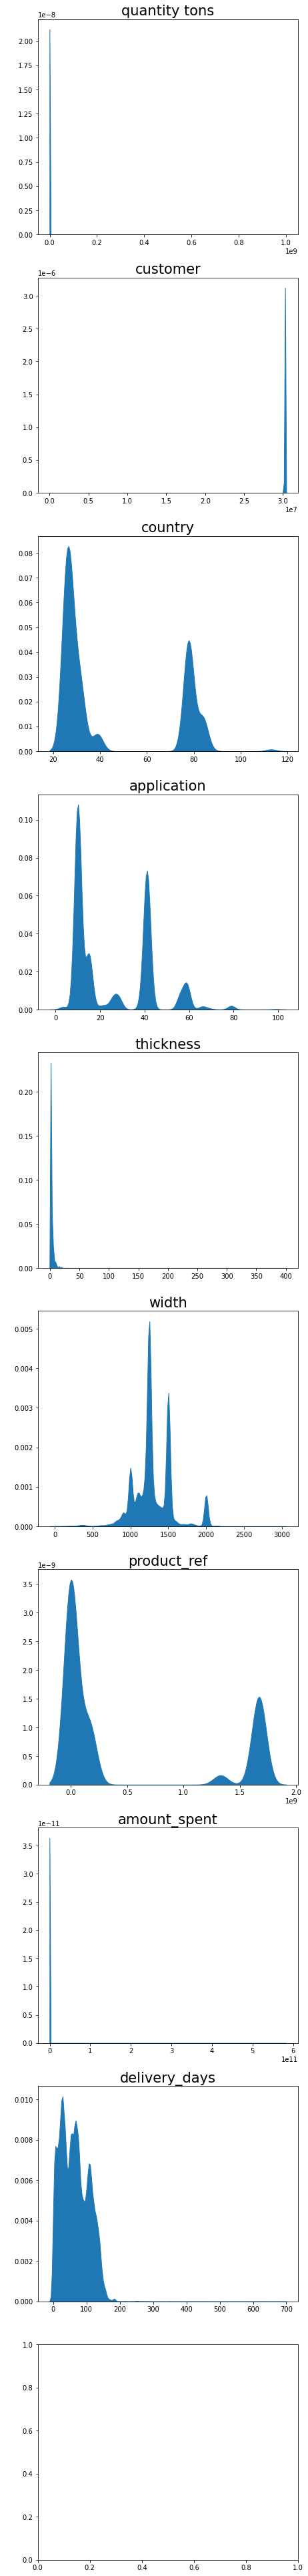

In [57]:
fig,ax=plt.subplots(figsize=(7,70),ncols=1,nrows=10)

i=0
for col in num_cols:
    sns.kdeplot(x=df[col],fill=True,alpha=1,ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col,fontsize=21)
    i=i+1
plt.show()

In [58]:
# check skewness of the distribution 
skew=[]
for col in num_cols:
    skew.append(round(df[col].skew(),3))
num_dist=pd.DataFrame({'features':num_cols,'skewness':skew})
num_dist

,features,skewness
0,quantity tons,424.642
1,customer,-149.089
2,country,0.754
3,application,0.724
4,thickness,15.303
5,width,0.375
6,product_ref,1.015
7,amount_spent,422.668
8,delivery_days,0.470


Feature that have skewness between -0.05 and 0.05 are assumed to have gaussian distribution(normal distribution), but from the above result none of the numeric columns are in normal distribution.

**Numeric Correlation**

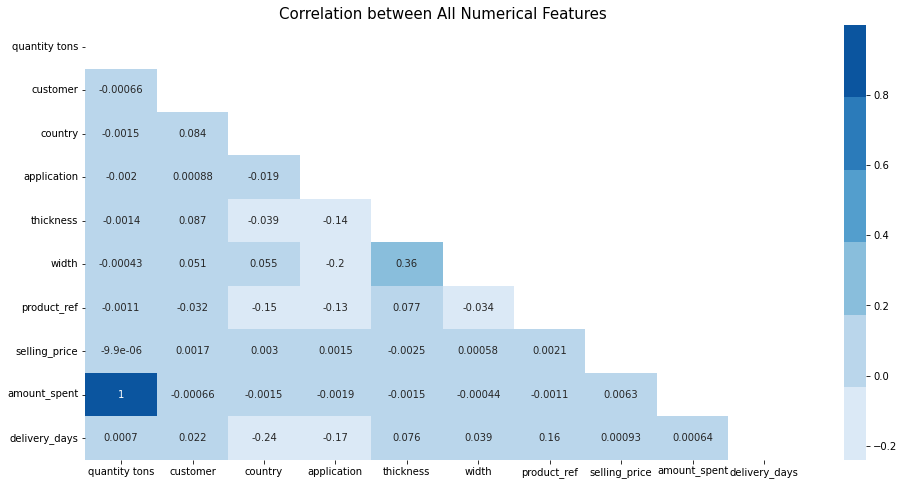

In [59]:
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Features',size=15)

# create mask
mask=np.triu(np.ones_like(df.corr()))

# create colormap
colormap=sns.color_palette('Blues')
# plot heatmap
sns.heatmap(df.corr(),annot=True,cmap=colormap,mask=mask)
plt.show()

In [60]:
# Target Relationship

tg_num_corr=[]

for col in num_cols:
    tg_num_corr.append(df[col].corr(df['selling_price']))
    
# create as DataFrame
tg_num_df=pd.DataFrame({'numerical_predictor':num_cols,'correlation_w_target':tg_num_corr})

# sort the DataFrmae by the absolute vaue of their correlation coefficient,descending
tg_num_df=tg_num_df.sort_values(by='correlation_w_target',ascending=False).reset_index(drop=True)

tg_num_df

,numerical_predictor,correlation_w_target
0,amount_spent,0.006337
1,country,0.002993
2,product_ref,0.002117
3,customer,0.001747
4,application,0.001462
5,delivery_days,0.000930
6,width,0.000584
7,quantity tons,-0.000010
8,thickness,-0.002467


### outlier Detection           
<!--  -->                
Box Plot

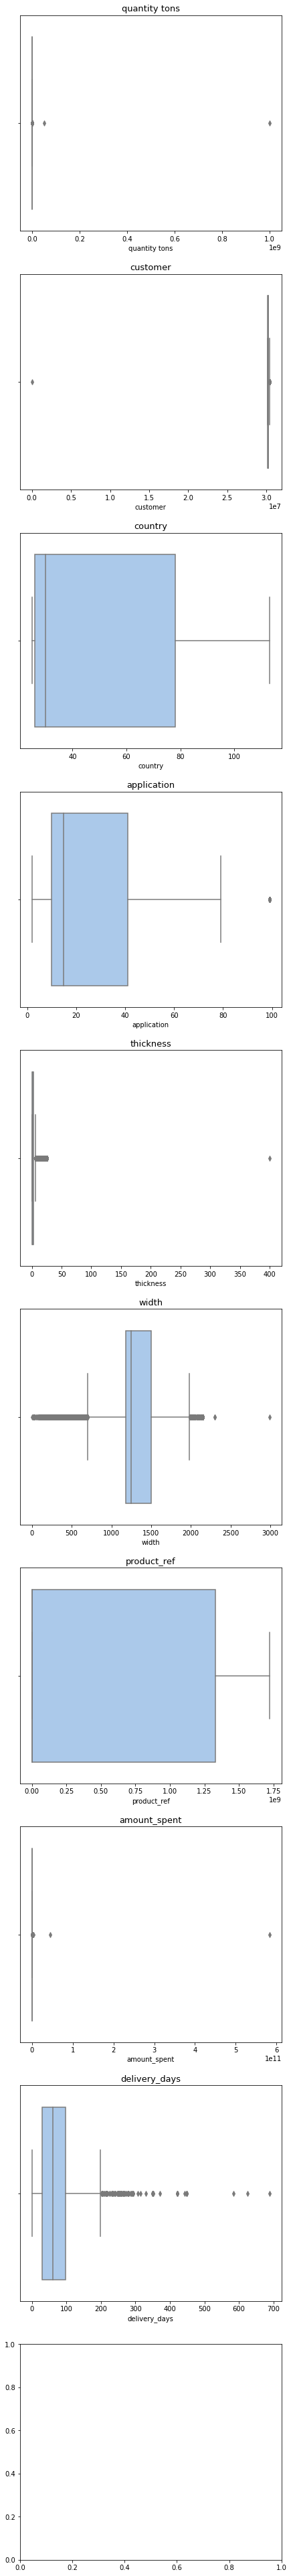

In [61]:
# set the figure
fig,ax=plt.subplots(ncols=1,nrows=10,figsize=(7,70))
i=0
for col in num_cols:
    sns.boxplot(data=df,x=col,ax=ax[i],palette='pastel')
    ax[i].set_title(col,fontsize=13)
    i=i+1
    
plt.show()

In [62]:
#Remove Outlier Using Z-score

from scipy import stats

filtered_entries=np.array([True]*len(df))
for col in num_cols:
            zscore=abs(stats.zscore(df[col]))
            filtered_entries= (zscore<3) & filtered_entries
df_z=df[filtered_entries]

print(f'number of rows after removing outliers :{len(df_z)}')

number of rows after removing outliers :174013


In [63]:
# Removing outliers using IQR

filtered_entries=np.array([True]*len(df))
for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    filtered_entries = ((df[i] >= low_limit) & (df[i] <= high_limit)) & filtered_entries
df_iqr = df[filtered_entries]

print(f'Number of rows after filtering outlier: {len(df_iqr)}')

Number of rows after filtering outlier: 137778


Based on the result of calculation using Z-score as well as the IQR, it can be seen that the number od deleted rows based on the IQR is far more than z-score. Therefore, we decide to choose the Z-score method to remove the outliers.

In [64]:
df=df_z

### Scaling              
<!--  -->             
this is technique used scale the numeric data based on the type of distribution. So, our numeric features does not have Normal Distribution. We will be using Normalization technique.

In [65]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

mm_scaler=MinMaxScaler()
df[num_cols]=mm_scaler.fit_transform(df[num_cols])

Creating Dummy variable for categorical variables

In [66]:
# Converting categorical_values into numerical_values using get_dummies
df = pd.get_dummies(columns=['item type'], data=df, prefix='item')

df=pd.get_dummies(columns=['status'],data=df,prefix='status')

splitting the dataset

In [67]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=101)

# Modeling

In [69]:
# 1. Linear Regression

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# lr = LinearRegression() 
# lr.fit(X_train, y_train) 

# preds_valid = lr.predict(X_test)

# print('Training Score(r2_score)',r2_score(y_train,lr.predict(X_train)))
# print()
# print('Test Score(r2_Score)',r2_score(y_test,lr.predict(X_test)))

In [70]:
# 2.Random Forest

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

# preds_valid = rf.predict(X_test)

# print('Training Score(r2_score)',r2_score(y_train,rf.predict(X_train)))
# print()
# print('Test Score(r2_score)',r2_score(y_test,rf.predict(X_test)))

In [71]:
# 3. Xgb regressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=101,n_estimators=100)
xgb.fit(X_train,y_train)

preds_valid = xgb.predict(X_test)

print('Training Score(r2_score)',r2_score(y_train,xgb.predict(X_train)))
print()
print('Test Score(r2_score)',r2_score(y_test,xgb.predict(X_test)))

Training Score(r2_score) 0.9999999825556192

Test Score(r2_score) 0.6443887977709057


In [72]:
#  4. LGBM
# import lightgbm as lgb

# lgbr = lgb.LGBMRegressor(n_estimators = 180,random_state=101)
# lgbr.fit(X_train,y_train)

# preds_valid = lgbr.predict(X_test)

# print('Training Score(r2_score)',r2_score(y_train,lgbr.predict(X_train)))
# print()
# print('Test Score(r2_score)',r2_score(y_test,lgbr.predict(X_test)))

In [73]:
# 5. Catboost

# from catboost import CatBoostRegressor

# cbr = CatBoostRegressor(verbose = False , eval_metric = 'R2',random_state=101)
# cbr.fit(X_train,y_train)

# preds_valid = cbr.predict(X_test)

# print('Training Score(r2_score)',r2_score(y_train,cbr.predict(X_train)))
# print()
# print('Test Score(r2_score)',r2_score(y_test,cbr.predict(X_test)))

**XGBoostRegressor** model perfomed best from all the models. So, decided to Hyper-tune the model

## Hyperparameter the XGBoostregressor

param value: 1; train: 0.9999990139292833; test: 0.6216412576415806
param value: 2; train: 0.9999997842520053; test: 0.7493808096257494
param value: 3; train: 0.9999998981209901; test: 0.8694198444516595
param value: 4; train: 0.9999999489456258; test: 0.9306895069026474
param value: 5; train: 0.9999999683737716; test: 0.9530714580760912
param value: 6; train: 0.9999999825556192; test: 0.6443887977709057
param value: 7; train: 0.9999999875320437; test: 0.9721681104306751
param value: 8; train: 0.9999999909183953; test: -0.6683370933502035
param value: 9; train: 0.9999999936798861; test: -1.8429126469828105
param value: 10; train: 0.9999999952775166; test: -0.8172803002562283


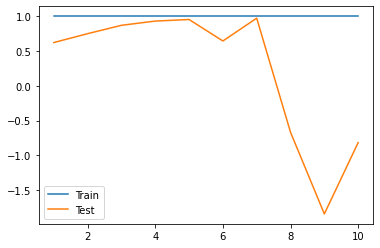

In [74]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 10, 10)] # max_depth

# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBRegressor(max_depth=c, random_state=101) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_scores.append(train_r2)

    # eval on test
    y_pred_test = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_scores.append(test_r2)
    
    print('param value: ' + str(c) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()


Based on the output of the learning curve above, it can be seen that **max_depth=7** shows better comparison results than the others, then proceed to search for the next best hyperparameter.

param value: 0.0; train: 0.9999999875320437; test: 0.9721681104306751
param value: 11.11111111111111; train: 0.9999999878237309; test: 0.9728506005025854
param value: 22.22222222222222; train: 0.9999999876802894; test: 0.9726454309202587
param value: 33.33333333333333; train: 0.9999999876825343; test: 0.9727466404596959
param value: 44.44444444444444; train: 0.9999999874277715; test: 0.9721601739353756
param value: 55.55555555555556; train: 0.9999999874271664; test: 0.9721584931838007
param value: 66.66666666666666; train: 0.9999999875711555; test: 0.972468278468478
param value: 77.77777777777777; train: 0.9999999874985809; test: 0.9723690347817519
param value: 88.88888888888889; train: 0.9999999877331758; test: 0.9725262273298937
param value: 100.0; train: 0.9999999877100467; test: 0.9725218226821993


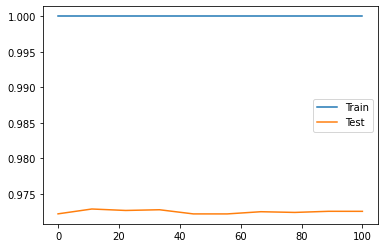

In [75]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 10, 10)] # max_depth
param_values= [float(x) for x in np.linspace(0, 100, num = 10)]
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBRegressor(max_depth=7,gamma=c, random_state=101) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_scores.append(train_r2)

    # eval on test
    y_pred_test = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_scores.append(test_r2)
    
    print('param value: ' + str(c) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()


Based on the output learning curve above, it can be seen that **gamma = 11.11** shows better comparison results than the others, then proceed to search for the next best hyperparameter.

param value: auto; train: 0.9999999953779172; test: -0.8152984136985781
param value: exact; train: 0.9999999953779172; test: -0.8152984136985781
param value: approx; train: 0.9999999864153212; test: 0.9690306201996366
param value: hist; train: 0.9999999948301901; test: 0.9824990002061789


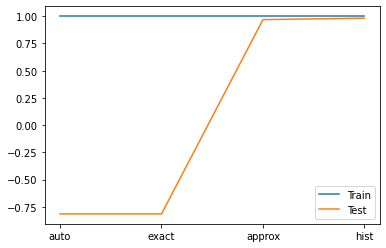

In [76]:
param_values=['auto', 'exact', 'approx', 'hist']
# param_values = [int(x) for x in np.linspace(1, 10, 10)] # max_depth
# param_values= [float(x) for x in np.linspace(0, 100, num = 10)] # gamma 
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBRegressor(max_depth=10,gamma=11.11, tree_method=c,random_state=101) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_scores.append(train_r2)

    # eval on test
    y_pred_test = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_scores.append(test_r2)
    
    print('param value: ' + str(c) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()


Based on the output learning curve above, it can be seen that **tree_method = hist** shows better comparison results than the others, then proceed to search for the next best hyperparameter.

param value: 1; train: 0.9999999870527936; test: 0.9767703301984729
param value: 3; train: 0.99986525820106; test: -724524.0762309232
param value: 5; train: 0.9987528288804264; test: -140910.4026805775
param value: 7; train: 0.9963892062369138; test: -36770.61650679249
param value: 9; train: 0.988528194136922; test: -58634.917086588124
param value: 11; train: 0.9759170838657923; test: -76774.08289180821
param value: 13; train: 0.9623214370771501; test: -72914.73126091134
param value: 15; train: 0.946098849702458; test: -32524.2184151953
param value: 17; train: 0.9252400031143987; test: -30810.597568350782
param value: 20; train: 0.8943144297512314; test: -67643.63578032785


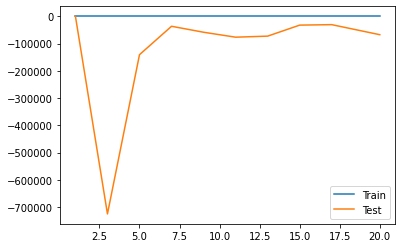

In [77]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
#param_values= [float(x) for x in np.linspace(0, 10, num = 10)]
#param_values=[float(x) for x in np.linspace(0, 100, num = 10)]
param_values= [int(x) for x in np.linspace(1, 20, num = 10)]
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBRegressor(max_depth=7,gamma=11.11, tree_method='hist',min_child_weight=c,random_state=101) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_scores.append(train_r2)

    # eval on test
    y_pred_test = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_scores.append(test_r2)
    
    print('param value: ' + str(c) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()


Based on the output learning curve above, it can be seen that **min_child_weight = 1** shows better comparison results than the others, then proceed to search for the next best hyperparameter.

## Tuning

Then, because all the optimal hyperparameters being searched for have all been found, th the next step is to run again using the optimal hyperparameters to see the changes in the output produced by this XGBoost model.

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [7],
                    'gamma' : [11.11],
                    'tree_method' : ['hist'],
                    'min_child_weight' : [1],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 5)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
                    }

from xgboost import XGBClassifier
xg = XGBRegressor(random_state=101)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv= 5, random_state=101, scoring='r2', n_iter=20)
xg_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=20,
                   param_distributions={'alpha': [0.0, 0.25, 0.5, 0.75, 1.0],
                                        'colsample_bytree': [0.0, 0.25, 0.5,
                                                             0.75, 1.0],
                                        'eta': [0.0, 0.25, 0.5, 0.75, 1.0],
                                        'gamma': [11.11],
                                        'lambda': [0.0, 0.25, 0.5, 0.75, 1.0],
                                        'max_depth': [7],
                                        'min_child_weight': [1],
                                        'tree_method': ['hist']},
                   random_state=101, scoring='r2')

In [79]:
preds_valid = xg_tuned.predict(X_test)

print('Training Score(r2_score)',r2_score(y_train,xg_tuned.predict(X_train)))
print()
print('Test Score(r2_score)',r2_score(y_test,xg_tuned.predict(X_test)))

Training Score(r2_score) 0.9999999874613504

Test Score(r2_score) 0.9783415138938402
